In [58]:
df.to_csv("df_news_romance.csv", index=False)

# How does supervised machine learning work?
Supervised machine learning takes places in two steps - the *training* phase, and the *testing* phase.  In the training phase, you use a portion of your data to *train* your algorithm (which, in our case, is a classification algorithm).  You provide both your feature vector and your labels to the algorithm, and the algorithm searches for patterns in your data that can help associate it with a particular label.

In the testing phase, we use the classifier we trained in the previous step, and give it previously unseen feature vectors representing unseen data to the algorithm, and have the algorithm predict the label.  We can then compare the "true" label to the predicted label, and see if our classifier provides us with a good and generlizable way of accomplishing the task (in our case, the task of automatically distinguishing news sentences from romance sentences).

![imagemlsteps](images/mlsteps.png)
Source: Andrew Rosenberg


It's important to remember that we cannot use the same data we used to build the classifier to test the data; if we did, our classifier would be 100% correct all of the time!  This will not tell us how our trained classifer will perform on new, unseen data.  We therefore need to split our data into a *train set* and a *test set*.
- We will use the train set data to train our classifier
- We will use the test set data to test our classifier

First, we need to load in the Python libraries that we will be using for our analysis. 

In [2]:
import nltk
from nltk.corpus import brown
from nltk import pos_tag_sents
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

### Read data in from a spreadsheet
Lets take the data we just saved out and load it back into a dataframe so that we can do some analysis with it!

In [3]:
df = pd.read_csv("df_news_romance.csv")

### Preparing data for machine learning
We're almost ready to do some machine learning!  First, we need to split our data into *feature vectors* and *labels*.  We need them separated to train the classifier.  Remember, the features we are using to train our classifier are numbers of nouns, adjectives, and adverbs are in each sentence.  (We are not using the sentences themselves as features!)

In [4]:
fv = df[["NN", "JJ", "RB"]]
fv.head()

,NN,JJ,RB
0,11,2,0
1,13,2,1
2,16,2,0
3,9,3,1
4,5,3,1


In [5]:
df['label'].value_counts()

news       4623
romance    4431
Name: label, dtype: int64

We have more news sentences than romance sentences; this is not a problem, but it's something to take note of during evaluation.


In [72]:
df.groupby('label').sum()

,NN,JJ,RB
label,,,
news,31593,6678,2935
romance,13821,4022,3570


# Are there patterns in the individual observations
We can make a scatter plot of our data colored by label to see if the patterns observed in the aggregate are visible in the individual observations. Since 3D scatter plots are really hard to visualize cleanly, we will generate a matrix of scatter plots to visualize whether the data seperates on the feature vectors. We will use the seaborn visualization library because it plots categorical data well. 

<IPython.core.display.Javascript object>


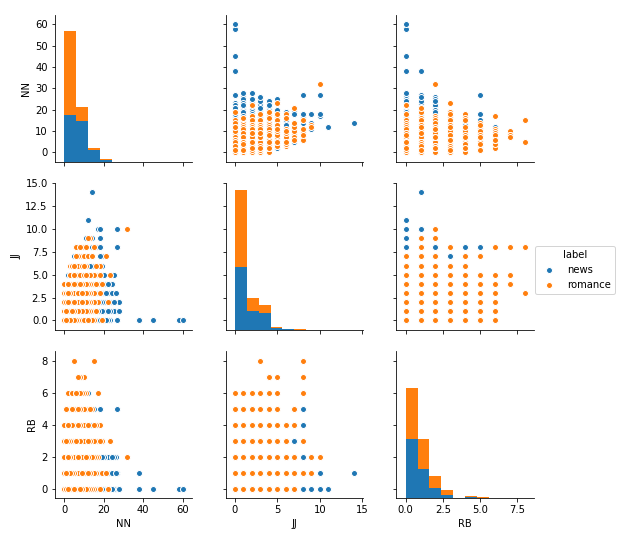

In [79]:
import seaborn as sns
_ = sns.pairplot(df, hue="label")
sns.pairplot?

### Partitioning data into train and test sets
When you are partitioning your data into train and test sets, a good place to start is to use 75% of your data for training,and 25% of your data for testing.  We want as much training data as possible, while also having enough testing data to ensure that our trained classifier is generalizable across a number of examples.  This will also lead to more accurate evalutation of our trained classifier.

Fortunately, sklearn has a function that will do exactly this!

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fv, df['label'],
                                                stratify=df['label'], 
                                                test_size=0.25,
                                                   random_state = 42)

- We use the "stratify" argument because we have an uneven amount of training data; we have more news sentances than romance sentences.  By using stratify, we ensure that our classifier will take this data imbalence into account.


- In this example, we are using a fixed random state, to ensure we will always get exactly the same value when we classify.  Adding this argument is unnecessary for most types of classification; we do it here to ensure our results do not vary slightly across runs.

Let's check the size of our train and test datasets using the `.shape` attribute of train and test data. 

In [9]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6790, 3) (6790,)
(2264, 3) (2264,)


### What classifier do I use?
Chosing a classifier can be a challenging task.  However, this flowchart can give you an idea of where to start!

![algorithms_cheatsheet](images/algorithms_cheatsheet.png)
Source: Andreas Mueller


According to this, we are going to use LinearSVC, which is a linear model for classification that separates classes using a line, a plane, or a hyperplane. SVC stands for "Support Vector Classifier", which is a type of support vector machine algorithm.

![linearsvc](images/linearsvc.png)
Source: Andreas Mueller

### An animated example of classification 
The following animated GIF shows an example of linear classification.

![croppedml](images/croppedml.gif)

Source: Andrew Rosenberg

## Let's build a classification algorithm with sklearn!
One of the best things about sklearn is the simplicity of its syntax.


To do machine learning with sklearn, follow these three steps (the function names remain the same, regardless of the classifier you use!):

### Step 1:  Import your desired classifier

In [10]:
from sklearn.svm import LinearSVC

### Step 2: Create an instance of your machine learning algorithm

In [11]:
classifier = LinearSVC()

### Step 3:  Fit your data to your classifier (train), predict labels for unseen data (test), and score!

In [12]:
classifier.fit(X_train, y_train)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [13]:
y_predict = classifier.predict(X_test)

In [14]:
classifier.score(X_test, y_test)

0.70892226148409898

Right now, our classifier can predict previously unseen news and data 

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_predict)
confusion_matrix


|      |actual news | actual romance |
|:--: | :--:| :--:|
|predicted news | 759 | 397 |
|predicted romance|282 | 826|

## Add visualization of the decision boundaries (Hannah)

## Change paramaters example

Every classification algorithm has paramaters, which we can see above where we created an instance of a classifier.

~~~
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
~~~

In our linear SVC example, the paramater is C, with a default of 1.0.  It is important to know that the default paramater is not always the best paramater for the data, and that it is common to try several different values of C in order to optimize the algorithm for your data.  In the code below, we show an example of searching through several different values of C to find the best value for paramater C for our particular data.  We search across our training data only, to ensure that we are not generalizing too closely to our testing data (which would be an example of *overfitting* our data to the classification algorithm).

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

from sklearn.grid_search import GridSearchCV
grid_search = GridSearchCV(LinearSVC(), param_grid, cv=10)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

With our new optimal C paramater (which in our case happens to be the default paramater, though that is not always the case), we can reclassify, setting C manually with the result of C that we get from grid searching through different paramaters of C. 

In [ ]:
classifier = LinearSVC(C=1)
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

In [ ]:
classifier.score(X_test, y_test)

### Practice 4:  Change the C paramater of the LinearSVC classifier and see how it affects the performance of the classifier

## Add visualization or animation of the paramater searching (Hannah)